# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Three observable trends based on the data
     1. As expected, the temperature is higher the closer you get to the equator. However, the data shows that the temperature is generally higher in the southern hempishere as it relates to latitude.
     2. Humidity levels are generally higher across the cities. Humidity levels tend to be higher in cities in the northern hemisphere and tend to fall lower in the southern hemisphere, due to drier climates.
     3. There is low correlation between cloud coverage and latitude. The northern hemisphere shows a slightly higher concentration of high cloud coverage.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# URL for Weather Map API Call
url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=' + weather_api_key

#query_url = url + "appid=" + weather_api_key + "&q=" + city

In [4]:
response = (requests.get(url + '&q=' + city)).json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 41},
 'cod': 200,
 'coord': {'lat': 73.5069, 'lon': 80.5464},
 'dt': 1612992759,
 'id': 1507390,
 'main': {'feels_like': -33.03,
          'grnd_level': 1011,
          'humidity': 88,
          'pressure': 1017,
          'sea_level': 1017,
          'temp': -21.41,
          'temp_max': -21.41,
          'temp_min': -21.41},
 'name': 'Dikson',
 'sys': {'country': 'RU', 'sunrise': 1613017279, 'sunset': 1613035377},
 'timezone': 25200,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 45, 'speed': 8.34}}


In [5]:
# lists to hold items
city_name = []
lat = []
lng = []
temp = []
max_temp = []
humidity = []
clouds = []
wind = []
country = []

# set counter
counter = 1


for city in cities:
    try:
        response = (requests.get(url + '&q=' + city)).json()
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        print(f'City number {counter} of {len(cities)} complete. | Added {city}')
        counter = counter + 1
    
    except KeyError:
        print(f'Missing data in city number {counter} of {len(cities)}. | Skipping {city}')
        counter = counter + 1
        
    #finally:
        #break

City number 1 of 621 complete. | Added moron
City number 2 of 621 complete. | Added huanren
City number 3 of 621 complete. | Added butaritari
City number 4 of 621 complete. | Added necochea
City number 5 of 621 complete. | Added ushuaia
City number 6 of 621 complete. | Added qaanaaq
City number 7 of 621 complete. | Added nago
City number 8 of 621 complete. | Added richards bay
City number 9 of 621 complete. | Added churapcha
City number 10 of 621 complete. | Added port macquarie
City number 11 of 621 complete. | Added khatanga
Missing data in city number 12 of 621. | Skipping illoqqortoormiut
City number 13 of 621 complete. | Added hobart
City number 14 of 621 complete. | Added vaini
City number 15 of 621 complete. | Added vestmannaeyjar
Missing data in city number 16 of 621. | Skipping bocaranga
City number 17 of 621 complete. | Added chuy
City number 18 of 621 complete. | Added longyearbyen
City number 19 of 621 complete. | Added matane
City number 20 of 621 complete. | Added gat
Cit

City number 165 of 621 complete. | Added chivilcoy
City number 166 of 621 complete. | Added ambovombe
City number 167 of 621 complete. | Added qaqortoq
City number 168 of 621 complete. | Added birjand
City number 169 of 621 complete. | Added thompson
City number 170 of 621 complete. | Added tutoia
City number 171 of 621 complete. | Added castro
City number 172 of 621 complete. | Added seydi
City number 173 of 621 complete. | Added port blair
City number 174 of 621 complete. | Added rennes
City number 175 of 621 complete. | Added marsh harbour
Missing data in city number 176 of 621. | Skipping barentsburg
City number 177 of 621 complete. | Added salisbury
City number 178 of 621 complete. | Added bandarbeyla
City number 179 of 621 complete. | Added volnovakha
City number 180 of 621 complete. | Added saint-philippe
City number 181 of 621 complete. | Added bredasdorp
City number 182 of 621 complete. | Added katsuura
City number 183 of 621 complete. | Added belaya gora
City number 184 of 62

City number 326 of 621 complete. | Added lagoa vermelha
Missing data in city number 327 of 621. | Skipping palabuhanratu
City number 328 of 621 complete. | Added tongren
City number 329 of 621 complete. | Added port alfred
Missing data in city number 330 of 621. | Skipping attawapiskat
City number 331 of 621 complete. | Added cidreira
City number 332 of 621 complete. | Added berlevag
City number 333 of 621 complete. | Added hervey bay
City number 334 of 621 complete. | Added skjervoy
City number 335 of 621 complete. | Added iguai
City number 336 of 621 complete. | Added henties bay
City number 337 of 621 complete. | Added bathsheba
City number 338 of 621 complete. | Added kaitangata
City number 339 of 621 complete. | Added rio gallegos
Missing data in city number 340 of 621. | Skipping jabiru
City number 341 of 621 complete. | Added sabaudia
City number 342 of 621 complete. | Added paamiut
City number 343 of 621 complete. | Added cheremkhovo
City number 344 of 621 complete. | Added tek

City number 487 of 621 complete. | Added leavenworth
Missing data in city number 488 of 621. | Skipping tsihombe
City number 489 of 621 complete. | Added sembe
City number 490 of 621 complete. | Added rialma
City number 491 of 621 complete. | Added carauari
City number 492 of 621 complete. | Added les cayes
City number 493 of 621 complete. | Added puerto madryn
City number 494 of 621 complete. | Added savannakhet
City number 495 of 621 complete. | Added berekum
City number 496 of 621 complete. | Added atar
City number 497 of 621 complete. | Added bereznik
City number 498 of 621 complete. | Added lompoc
City number 499 of 621 complete. | Added morwell
City number 500 of 621 complete. | Added gafanha da encarnacao
City number 501 of 621 complete. | Added tadine
City number 502 of 621 complete. | Added palmas
City number 503 of 621 complete. | Added sungairaya
City number 504 of 621 complete. | Added nanakuli
City number 505 of 621 complete. | Added manta
City number 506 of 621 complete. 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_df = pd.DataFrame({'City': city_name,
                       'Latitude': lat,
                       'Longitude': lng,
                       'Temperature': temp,
                        'Max_Temp': max_temp,
                       'Humidity': humidity,
                       'Cloudiness': clouds,
                       'Wind': wind,
                       'Country': country})

city_df.to_csv("new_city_data.csv")

In [7]:
city_df.head()

,City,Latitude,Longitude,Temperature,Max_Temp,Humidity,Cloudiness,Wind,Country
0,Morón,-34.6534,-58.6198,77.43,79.00,62,57,7.00,AR
1,Huanren,41.2647,125.3667,20.68,20.68,95,0,3.09,CN
2,Butaritari,3.0707,172.7902,81.59,81.59,76,100,16.60,KI
3,Necochea,-38.5473,-58.7368,70.00,70.00,69,22,8.01,AR
4,Ushuaia,-54.8000,-68.3000,75.20,75.20,33,0,19.57,AR


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
city_df["Humidity"].max()

100

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [10]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The plot shows that the closer you get to the equator, the higher the temperature is. However, the temperature is generally higher in the southern hemisphere in relation to latitude


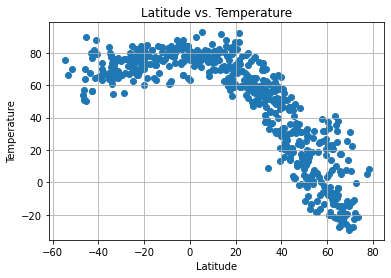

In [11]:
plt.scatter(city_df['Latitude'], city_df['Temperature'])
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)
print(f"The plot shows that the closer you get to the equator, the higher the temperature is. However, the temperature is generally higher in the southern hemisphere in relation to latitude")
plt.savefig("latitude_temp.png")

## Latitude vs. Humidity Plot

Humidity levels are generally higher across these cities. Humidity levels are high near the equator and are higher in the northern hemisphere than in the southern.


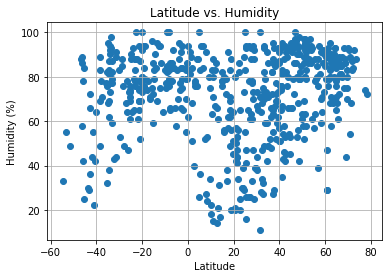

In [12]:
plt.scatter(city_df['Latitude'], city_df['Humidity'])
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
print(f"Humidity levels are generally higher across these cities. Humidity levels are high near the equator and are higher in the northern hemisphere than in the southern.")
plt.savefig("latitude_humidity.png")

## Latitude vs. Cloudiness Plot

The plot shows that there is no significant correlation between latitude and cloudiness


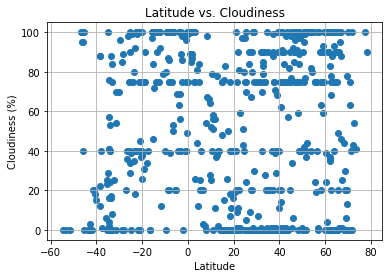

In [13]:
plt.scatter(city_df['Latitude'], city_df['Cloudiness'])
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
print(f"The plot shows that there is no significant correlation between latitude and cloudiness")
plt.savefig("latitude_cloudiness.png")

## Latitude vs. Wind Speed Plot

The plot shows that there is no significant correlation between latitude and windspeed


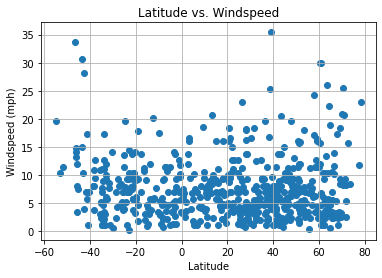

In [14]:
plt.scatter(city_df['Latitude'], city_df['Wind'])
plt.title("Latitude vs. Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.grid(True)
print(f"The plot shows that there is no significant correlation between latitude and windspeed")
plt.savefig("latitude_wind.png")

## Linear Regression

In [15]:
northern = city_df.loc[city_df["Latitude"] >= 0.0]
northern.reset_index(inplace=True)

southern = city_df.loc[city_df["Latitude"] < 0.0]
southern.reset_index(inplace=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7838551430797875
The plot shows that the closer to the equator, the higher the temperature


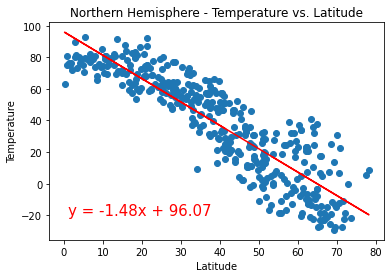

In [16]:
x_values = northern['Latitude']
y_values = northern['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

print(f"The r-squared is: {rvalue**2}")

plt.annotate(line_eq,(1,-20),fontsize=15,color="red")
plt.title("Northern Hemisphere - Temperature vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The plot shows that the closer to the equator, the higher the temperature")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.2221150317789378
The plot shows that the closer to the equator, the higher the temperature


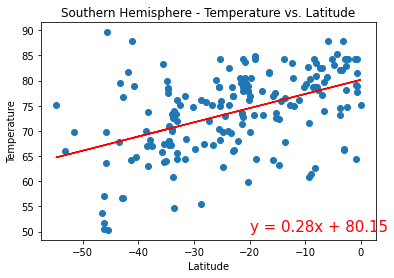

In [17]:
x_values = southern['Latitude']
y_values = southern["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

print(f"The r-squared is: {rvalue**2}")

plt.annotate(line_eq,(-20,50),fontsize=15,color="red")
plt.title("Southern Hemisphere - Temperature vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The plot shows that the closer to the equator, the higher the temperature")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.12780985407889375
The regression shows that there is not much correlation between humidity and latitude


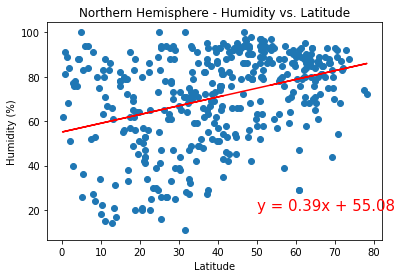

In [18]:
x_values = northern['Latitude']
y_values = northern["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

print(f"The r-squared is: {rvalue**2}")

plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The regression shows that there is not much correlation between humidity and latitude")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14993937127110302
The regression shows that there is not much correlation between humidity and latitude


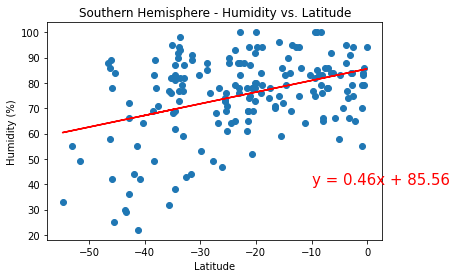

In [19]:
x_values = southern['Latitude']
y_values = southern["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

print(f"The r-squared is: {rvalue**2}")

plt.annotate(line_eq,(-10,40),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The regression shows that there is not much correlation between humidity and latitude")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.030753778053057297
The regression shows that there is not much correlation between cloudiness and latitude


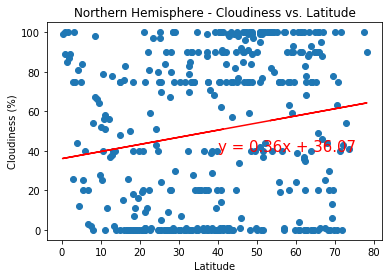

In [20]:
x_values = northern['Latitude']
y_values = northern['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

print(f"The r-squared is: {rvalue**2}")

plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The regression shows that there is not much correlation between cloudiness and latitude")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.12334776497938446
The regression shows that there is not much correlation between cloudiness and latitude


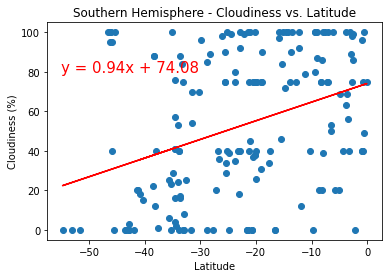

In [21]:
x_values = southern['Latitude']
y_values = southern['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

print(f"The r-squared is: {rvalue**2}")

plt.annotate(line_eq,(-55,80),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The regression shows that there is not much correlation between cloudiness and latitude")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.005908479385664133
The regression shows that there is not much correlation between humidity and windspeed


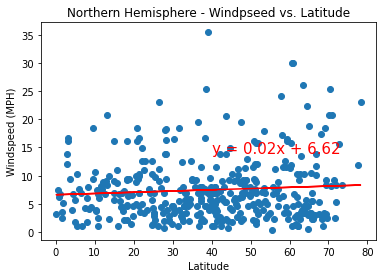

In [22]:
x_values = northern['Latitude']
y_values = northern['Wind']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

print(f"The r-squared is: {rvalue**2}")

plt.annotate(line_eq,(40,14),fontsize=15,color="red")
plt.title("Northern Hemisphere - Windpseed vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Windspeed (MPH)')
print(f"The regression shows that there is not much correlation between humidity and windspeed")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06576785596774604
The regression shows that there is not much correlation between windspeed and latitude


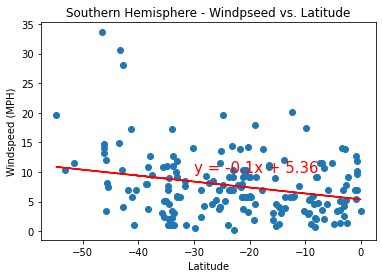

In [23]:
x_values = southern['Latitude']
y_values = southern['Wind']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

print(f"The r-squared is: {rvalue**2}")

plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Windpseed vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Windspeed (MPH)')
print(f"The regression shows that there is not much correlation between windspeed and latitude")
plt.show()